In [20]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix

In [8]:
# CHANGE depending on your local machine

os.chdir(r"D:\UNI\6th year\T2\COMP9417\Assignments\Group Assignment\chest_xray")

base_dir = 'chest_xray/'

train_dir = base_dir + 'train/'
test_dir = base_dir + 'test/'
val_dir = base_dir + 'val/'

train_neg = train_dir + 'NORMAL'
train_pos = train_dir + 'PNEUMONIA'
test_neg = test_dir + 'NORMAL'
test_pos = test_dir + 'PNEUMONIA'
val_neg = val_dir + 'NORMAL'
val_pos = val_dir + 'PNEUMONIA'

train_pos = [train_pos+'/'+i  for i in os.listdir(train_pos) ]
train_neg = [train_neg + '/' + i for i in os.listdir(train_neg) ]


test_pos = [test_pos + '/' + i for i in os.listdir(test_pos) ]
test_neg = [test_neg + '/' + i for i in os.listdir(test_neg)]

val_pos = [val_pos + '/' + i for i in os.listdir(val_pos)]
val_neg = [val_neg + '/' + i for i in os.listdir(val_neg)]
print('---------------------------------------------------')

train_full = train_pos + train_neg

# resizing images

# size of smallest image()
image_size = 127

# there are a few packages for image reading, here im using cv2

widths_train = []
heights_train = []

train_data = []
train_labels = []

count = 0
for train_img in train_full:
    img = cv2.imread(train_img, cv2.IMREAD_GRAYSCALE)
    
    widths_train.append(img.shape[0])
    heights_train.append(img.shape[1])
    
    img = cv2.resize(img, (image_size, image_size)).flatten()
    np_img = np.asarray(img)
    
    train_data.append(np_img)
    
    if "bacteria" in train_img or "virus" in train_img:
        train_labels.append(1)
    else:
        train_labels.append(0)

    if count % 750 == 0:
        print(f"{count} images processed")
    count += 1



print(sum(train_labels))


print(f"min width is {min(widths_train)}")
print(f"min heights is {min(heights_train)}")

test_data = []
test_labels = []

test_full = test_neg + test_pos


widths = []
heights = []

count = 0
for test_img in test_full:
    img = cv2.imread(test_img, cv2.IMREAD_GRAYSCALE)
    widths.append(img.shape[0])
    heights.append(img.shape[1])
    img = cv2.resize(img, (image_size, image_size)).flatten()
    np_img = np.asarray(img)
    test_data.append(np_img)
    if "bacteria" in test_img or "virus" in test_img:
        test_labels.append(1)
    else:
        test_labels.append(0)

    if count % 100 == 0:
        print(f"{count} images processed")
    count += 1
    
print(sum(test_labels))


print(f"min width is {min(widths)}")
print(f"min heights is {min(heights)}")

---------------------------------------------------
0 images processed
750 images processed
1500 images processed
2250 images processed
3000 images processed
3750 images processed
4500 images processed
3875
min width is 127
min heights is 384
0 images processed
100 images processed
200 images processed
300 images processed
400 images processed
500 images processed
600 images processed
390
min width is 344
min heights is 728


In [29]:
from sklearn.linear_model import LogisticRegression
train_scores = []
test_scores = []

# convert to np arrays
train_data = np.array(train_data)
train_labels = np.array(train_labels)


test_data = np.array(test_data)
test_labels = np.array(test_labels)


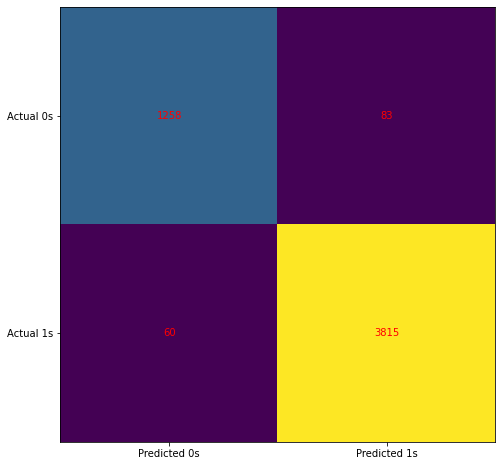

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1341
           1       0.98      0.98      0.98      3875

    accuracy                           0.97      5216
   macro avg       0.97      0.96      0.96      5216
weighted avg       0.97      0.97      0.97      5216



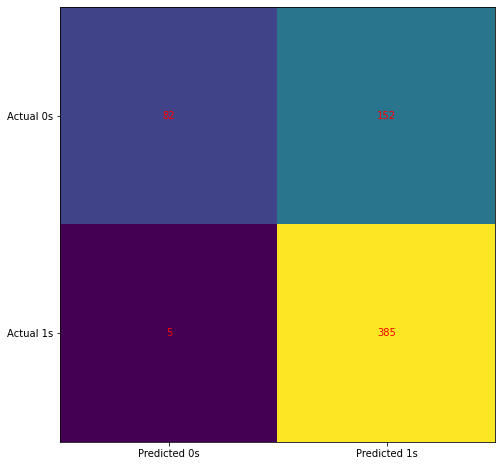

              precision    recall  f1-score   support

           0       0.94      0.35      0.51       234
           1       0.72      0.99      0.83       390

    accuracy                           0.75       624
   macro avg       0.83      0.67      0.67       624
weighted avg       0.80      0.75      0.71       624



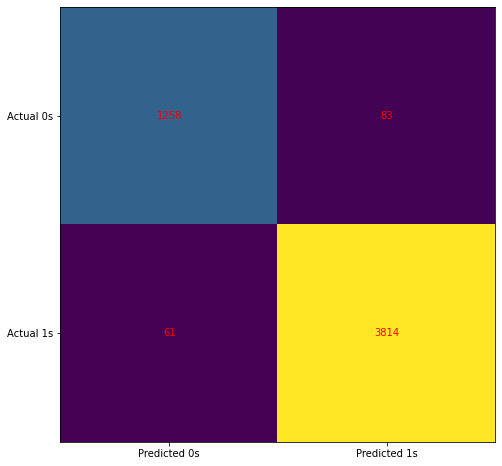

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1341
           1       0.98      0.98      0.98      3875

    accuracy                           0.97      5216
   macro avg       0.97      0.96      0.96      5216
weighted avg       0.97      0.97      0.97      5216



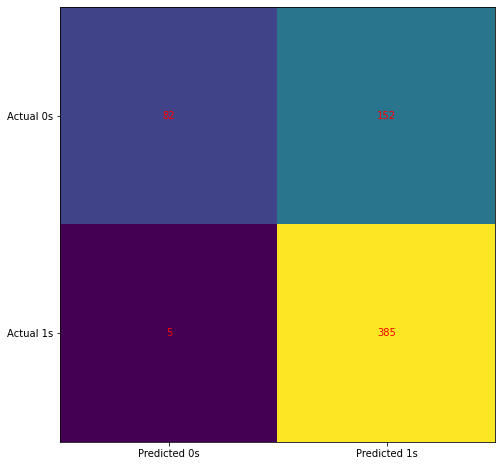

              precision    recall  f1-score   support

           0       0.94      0.35      0.51       234
           1       0.72      0.99      0.83       390

    accuracy                           0.75       624
   macro avg       0.83      0.67      0.67       624
weighted avg       0.80      0.75      0.71       624



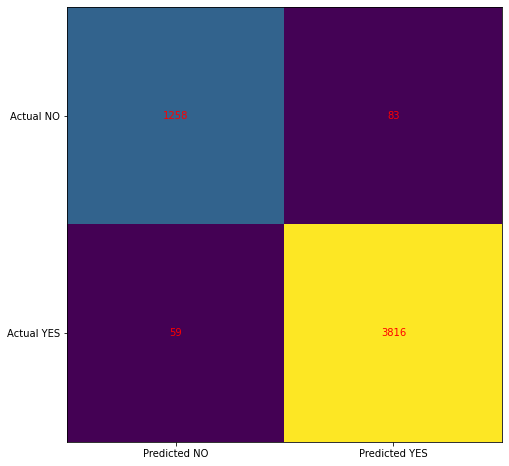

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1341
           1       0.98      0.98      0.98      3875

    accuracy                           0.97      5216
   macro avg       0.97      0.96      0.96      5216
weighted avg       0.97      0.97      0.97      5216



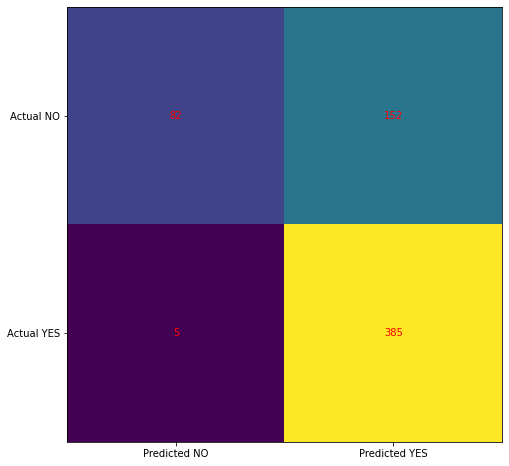

              precision    recall  f1-score   support

           0       0.94      0.35      0.51       234
           1       0.72      0.99      0.83       390

    accuracy                           0.75       624
   macro avg       0.83      0.67      0.67       624
weighted avg       0.80      0.75      0.71       624



In [30]:
#Saga
logisticRegr = LogisticRegression(penalty="l1", tol=0.01, solver="saga")
logisticRegr.fit(train_data , train_labels)
y_pred_train = logisticRegr.predict(train_data)
y_pred_test = logisticRegr.predict(test_data)

cm = confusion_matrix(train_labels, y_pred_train)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()
print(classification_report(train_labels, y_pred_train))

cm = confusion_matrix(test_labels, y_pred_test)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

print(classification_report(test_labels, y_pred_test))

logisticRegr = LogisticRegression(penalty="l2", tol=0.01, solver="saga")
logisticRegr.fit(train_data , train_labels)
y_pred_train = logisticRegr.predict(train_data)
y_pred_test = logisticRegr.predict(test_data)

cm = confusion_matrix(train_labels, y_pred_train)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()
print(classification_report(train_labels, y_pred_train))

cm = confusion_matrix(test_labels, y_pred_test)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

print(classification_report(test_labels, y_pred_test))

logisticRegr = LogisticRegression(penalty="elasticnet", l1_ratio=0.5, tol=0.01, solver="saga")
logisticRegr.fit(train_data , train_labels)
y_pred_train = logisticRegr.predict(train_data)
y_pred_test = logisticRegr.predict(test_data)

cm = confusion_matrix(train_labels, y_pred_train)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted NO', 'Predicted YES'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual NO', 'Actual YES'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()
print(classification_report(train_labels, y_pred_train))

cm = confusion_matrix(test_labels, y_pred_test)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted NO', 'Predicted YES'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual NO', 'Actual YES'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

print(classification_report(test_labels, y_pred_test))

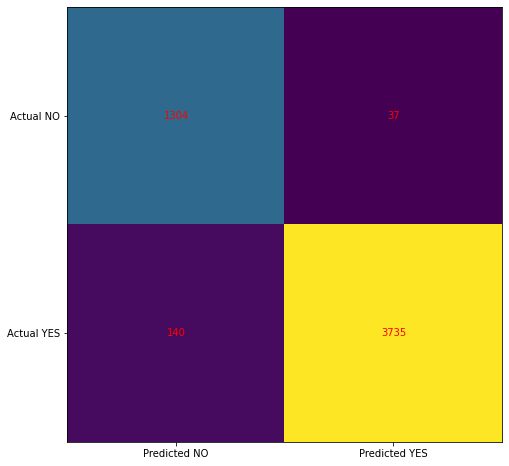

              precision    recall  f1-score   support

           0       0.90      0.97      0.94      1341
           1       0.99      0.96      0.98      3875

    accuracy                           0.97      5216
   macro avg       0.95      0.97      0.96      5216
weighted avg       0.97      0.97      0.97      5216



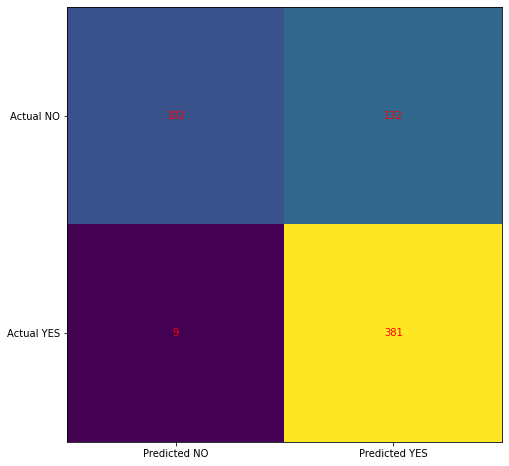

              precision    recall  f1-score   support

           0       0.92      0.44      0.59       234
           1       0.74      0.98      0.84       390

    accuracy                           0.77       624
   macro avg       0.83      0.71      0.72       624
weighted avg       0.81      0.77      0.75       624



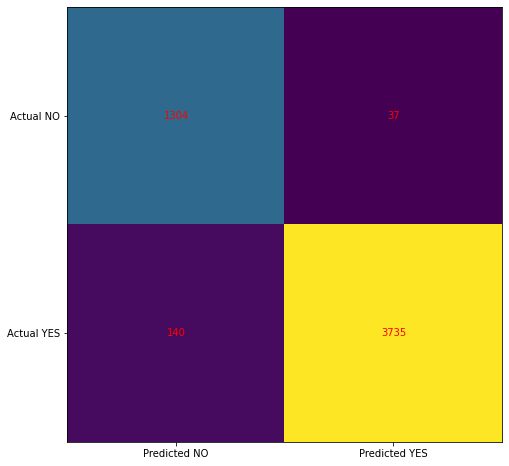

              precision    recall  f1-score   support

           0       0.90      0.97      0.94      1341
           1       0.99      0.96      0.98      3875

    accuracy                           0.97      5216
   macro avg       0.95      0.97      0.96      5216
weighted avg       0.97      0.97      0.97      5216



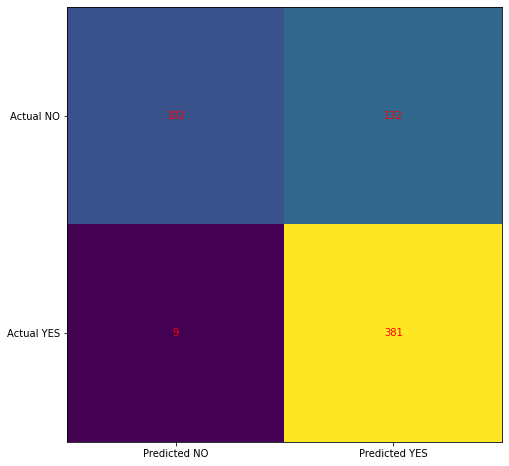

              precision    recall  f1-score   support

           0       0.92      0.44      0.59       234
           1       0.74      0.98      0.84       390

    accuracy                           0.77       624
   macro avg       0.83      0.71      0.72       624
weighted avg       0.81      0.77      0.75       624



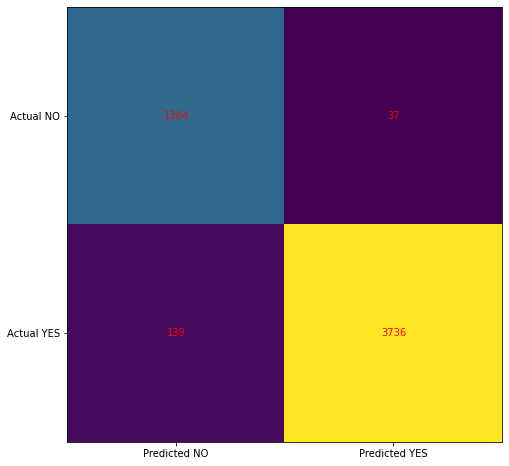

              precision    recall  f1-score   support

           0       0.90      0.97      0.94      1341
           1       0.99      0.96      0.98      3875

    accuracy                           0.97      5216
   macro avg       0.95      0.97      0.96      5216
weighted avg       0.97      0.97      0.97      5216



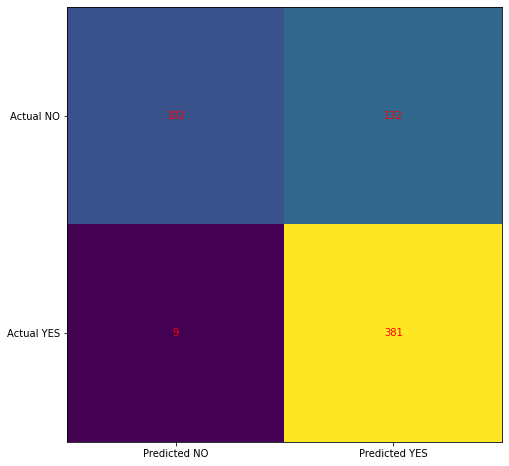

              precision    recall  f1-score   support

           0       0.92      0.44      0.59       234
           1       0.74      0.98      0.84       390

    accuracy                           0.77       624
   macro avg       0.83      0.71      0.72       624
weighted avg       0.81      0.77      0.75       624



In [31]:
#Saga
logisticRegr = LogisticRegression(penalty="l1", tol=0.01, solver="saga", class_weight="balanced")
logisticRegr.fit(train_data , train_labels)
y_pred_train = logisticRegr.predict(train_data)
y_pred_test = logisticRegr.predict(test_data)

cm = confusion_matrix(train_labels, y_pred_train)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted NO', 'Predicted YES'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual NO', 'Actual YES'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()
print(classification_report(train_labels, y_pred_train))

cm = confusion_matrix(test_labels, y_pred_test)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted NO', 'Predicted YES'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual NO', 'Actual YES'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

print(classification_report(test_labels, y_pred_test))

logisticRegr = LogisticRegression(penalty="l2", tol=0.01, solver="saga", class_weight="balanced")
logisticRegr.fit(train_data , train_labels)
y_pred_train = logisticRegr.predict(train_data)
y_pred_test = logisticRegr.predict(test_data)

cm = confusion_matrix(train_labels, y_pred_train)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted NO', 'Predicted YES'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual NO', 'Actual YES'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()
print(classification_report(train_labels, y_pred_train))

cm = confusion_matrix(test_labels, y_pred_test)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted NO', 'Predicted YES'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual NO', 'Actual YES'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

print(classification_report(test_labels, y_pred_test))

logisticRegr = LogisticRegression(penalty="elasticnet", l1_ratio=0.5, tol=0.01, solver="saga", class_weight="balanced")
logisticRegr.fit(train_data , train_labels)
y_pred_train = logisticRegr.predict(train_data)
y_pred_test = logisticRegr.predict(test_data)

cm = confusion_matrix(train_labels, y_pred_train)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted NO', 'Predicted YES'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual NO', 'Actual YES'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()
print(classification_report(train_labels, y_pred_train))

cm = confusion_matrix(test_labels, y_pred_test)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted NO', 'Predicted YES'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual NO', 'Actual YES'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

print(classification_report(test_labels, y_pred_test))


It seems that changing the penalty type doesnt change the results much

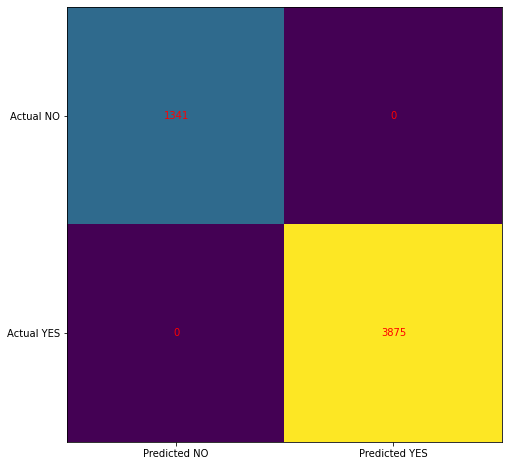

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1341
           1       1.00      1.00      1.00      3875

    accuracy                           1.00      5216
   macro avg       1.00      1.00      1.00      5216
weighted avg       1.00      1.00      1.00      5216



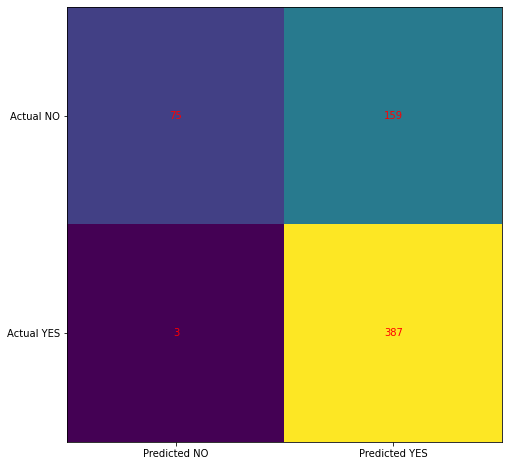

              precision    recall  f1-score   support

           0       0.96      0.32      0.48       234
           1       0.71      0.99      0.83       390

    accuracy                           0.74       624
   macro avg       0.84      0.66      0.65       624
weighted avg       0.80      0.74      0.70       624



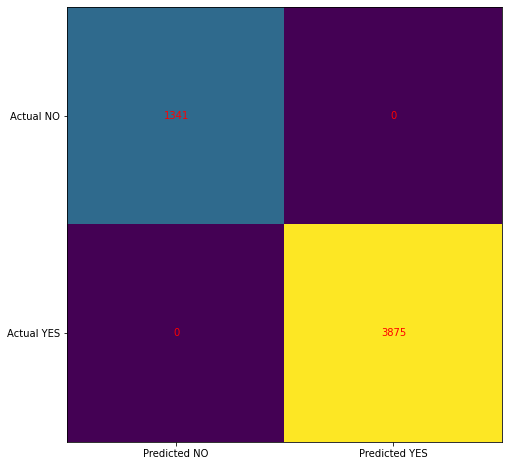

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1341
           1       1.00      1.00      1.00      3875

    accuracy                           1.00      5216
   macro avg       1.00      1.00      1.00      5216
weighted avg       1.00      1.00      1.00      5216



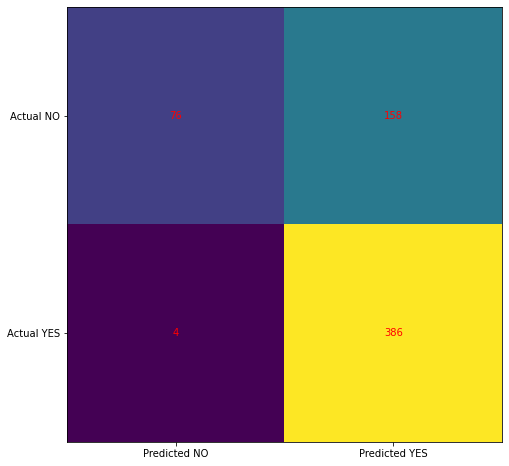

              precision    recall  f1-score   support

           0       0.95      0.32      0.48       234
           1       0.71      0.99      0.83       390

    accuracy                           0.74       624
   macro avg       0.83      0.66      0.66       624
weighted avg       0.80      0.74      0.70       624



In [32]:
#Newton-cg
logisticRegr = LogisticRegression(penalty="l2", tol=0.01, solver="newton-cg")
logisticRegr.fit(train_data , train_labels)
y_pred_train = logisticRegr.predict(train_data)
y_pred_test = logisticRegr.predict(test_data)

cm = confusion_matrix(train_labels, y_pred_train)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted NO', 'Predicted YES'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual NO', 'Actual YES'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()
print(classification_report(train_labels, y_pred_train))

cm = confusion_matrix(test_labels, y_pred_test)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted NO', 'Predicted YES'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual NO', 'Actual YES'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

print(classification_report(test_labels, y_pred_test))


logisticRegr = LogisticRegression(penalty="none", tol=0.01, solver="newton-cg")
logisticRegr.fit(train_data , train_labels)
y_pred_train = logisticRegr.predict(train_data)
y_pred_test = logisticRegr.predict(test_data)

cm = confusion_matrix(train_labels, y_pred_train)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted NO', 'Predicted YES'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual NO', 'Actual YES'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()
print(classification_report(train_labels, y_pred_train))

cm = confusion_matrix(test_labels, y_pred_test)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted NO', 'Predicted YES'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual NO', 'Actual YES'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

print(classification_report(test_labels, y_pred_test))


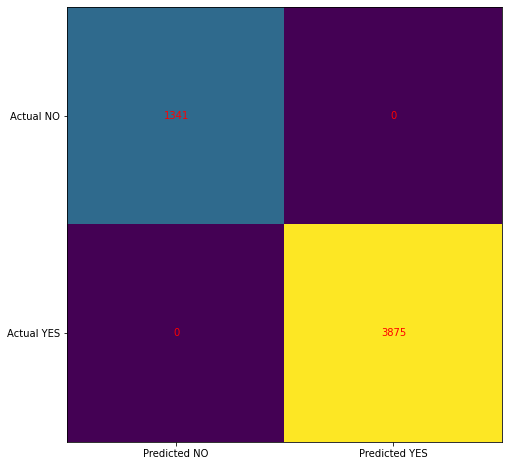

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1341
           1       1.00      1.00      1.00      3875

    accuracy                           1.00      5216
   macro avg       1.00      1.00      1.00      5216
weighted avg       1.00      1.00      1.00      5216



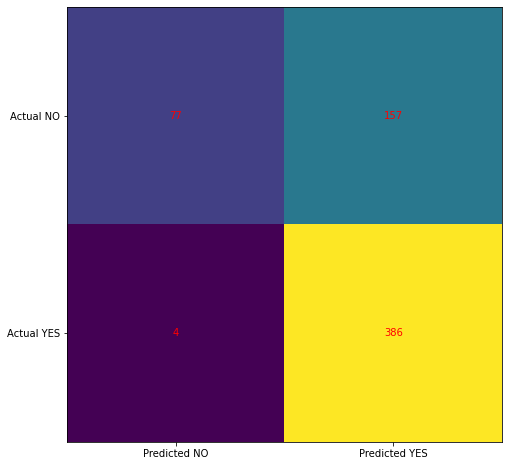

              precision    recall  f1-score   support

           0       0.95      0.33      0.49       234
           1       0.71      0.99      0.83       390

    accuracy                           0.74       624
   macro avg       0.83      0.66      0.66       624
weighted avg       0.80      0.74      0.70       624



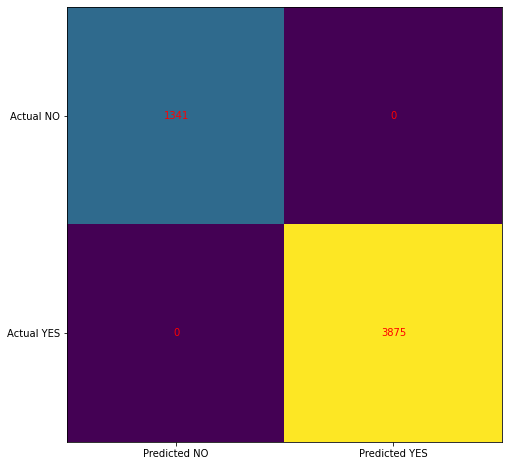

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1341
           1       1.00      1.00      1.00      3875

    accuracy                           1.00      5216
   macro avg       1.00      1.00      1.00      5216
weighted avg       1.00      1.00      1.00      5216



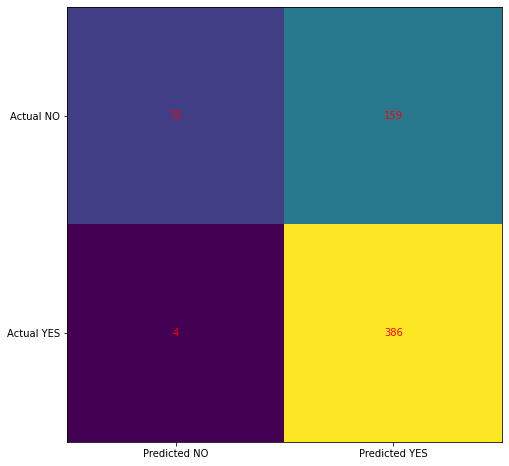

              precision    recall  f1-score   support

           0       0.95      0.32      0.48       234
           1       0.71      0.99      0.83       390

    accuracy                           0.74       624
   macro avg       0.83      0.66      0.65       624
weighted avg       0.80      0.74      0.70       624



In [33]:
#Newton-cg
logisticRegr = LogisticRegression(penalty="l2", tol=0.01, solver="newton-cg", class_weight="balanced")
logisticRegr.fit(train_data , train_labels)
y_pred_train = logisticRegr.predict(train_data)
y_pred_test = logisticRegr.predict(test_data)

cm = confusion_matrix(train_labels, y_pred_train)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted NO', 'Predicted YES'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual NO', 'Actual YES'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()
print(classification_report(train_labels, y_pred_train))

cm = confusion_matrix(test_labels, y_pred_test)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted NO', 'Predicted YES'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual NO', 'Actual YES'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

print(classification_report(test_labels, y_pred_test))


logisticRegr = LogisticRegression(penalty="none", tol=0.01, solver="newton-cg", class_weight="balanced")
logisticRegr.fit(train_data , train_labels)
y_pred_train = logisticRegr.predict(train_data)
y_pred_test = logisticRegr.predict(test_data)

cm = confusion_matrix(train_labels, y_pred_train)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted NO', 'Predicted YES'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual NO', 'Actual YES'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()
print(classification_report(train_labels, y_pred_train))

cm = confusion_matrix(test_labels, y_pred_test)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted NO', 'Predicted YES'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual NO', 'Actual YES'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

print(classification_report(test_labels, y_pred_test))


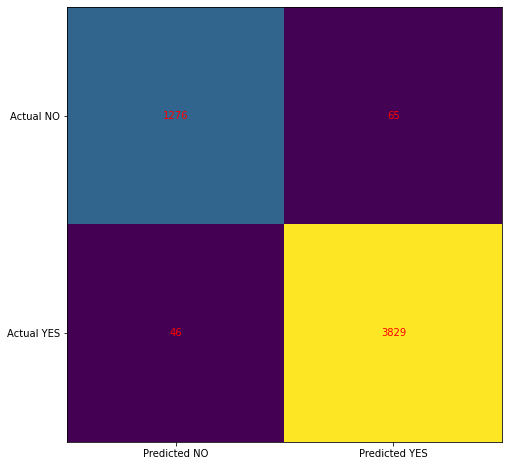

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1341
           1       0.98      0.99      0.99      3875

    accuracy                           0.98      5216
   macro avg       0.97      0.97      0.97      5216
weighted avg       0.98      0.98      0.98      5216



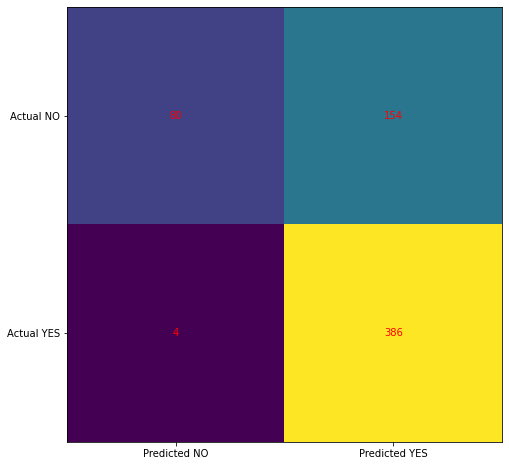

              precision    recall  f1-score   support

           0       0.95      0.34      0.50       234
           1       0.71      0.99      0.83       390

    accuracy                           0.75       624
   macro avg       0.83      0.67      0.67       624
weighted avg       0.80      0.75      0.71       624



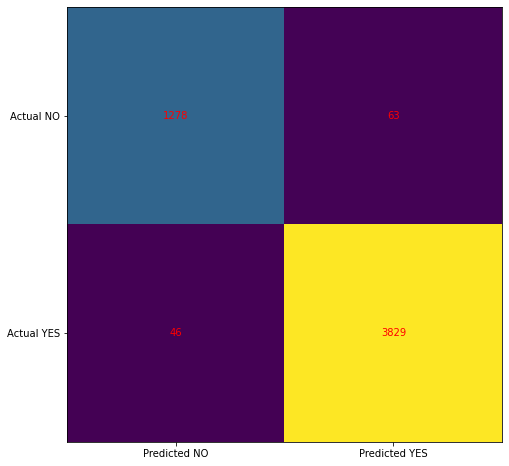

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1341
           1       0.98      0.99      0.99      3875

    accuracy                           0.98      5216
   macro avg       0.97      0.97      0.97      5216
weighted avg       0.98      0.98      0.98      5216



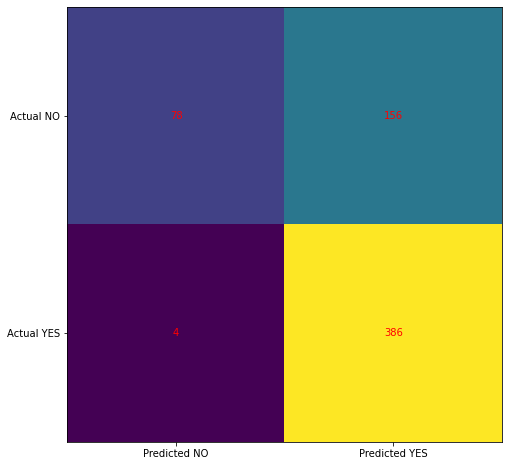

              precision    recall  f1-score   support

           0       0.95      0.33      0.49       234
           1       0.71      0.99      0.83       390

    accuracy                           0.74       624
   macro avg       0.83      0.66      0.66       624
weighted avg       0.80      0.74      0.70       624



In [34]:
#Sag
logisticRegr = LogisticRegression(penalty="none", tol=0.01, solver="sag")
logisticRegr.fit(train_data , train_labels)
y_pred_train = logisticRegr.predict(train_data)
y_pred_test = logisticRegr.predict(test_data)

cm = confusion_matrix(train_labels, y_pred_train)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted NO', 'Predicted YES'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual NO', 'Actual YES'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()
print(classification_report(train_labels, y_pred_train))

cm = confusion_matrix(test_labels, y_pred_test)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted NO', 'Predicted YES'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual NO', 'Actual YES'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

print(classification_report(test_labels, y_pred_test))


logisticRegr = LogisticRegression(penalty="l2", tol=0.01, solver="sag")
logisticRegr.fit(train_data , train_labels)
y_pred_train = logisticRegr.predict(train_data)
y_pred_test = logisticRegr.predict(test_data)

cm = confusion_matrix(train_labels, y_pred_train)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted NO', 'Predicted YES'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual NO', 'Actual YES'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()
print(classification_report(train_labels, y_pred_train))

cm = confusion_matrix(test_labels, y_pred_test)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted NO', 'Predicted YES'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual NO', 'Actual YES'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

print(classification_report(test_labels, y_pred_test))


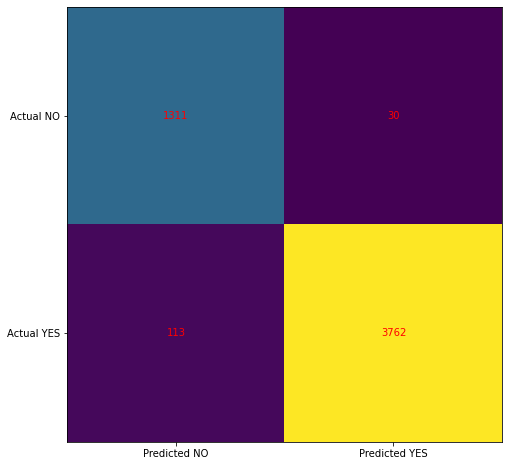

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1341
           1       0.99      0.97      0.98      3875

    accuracy                           0.97      5216
   macro avg       0.96      0.97      0.96      5216
weighted avg       0.97      0.97      0.97      5216



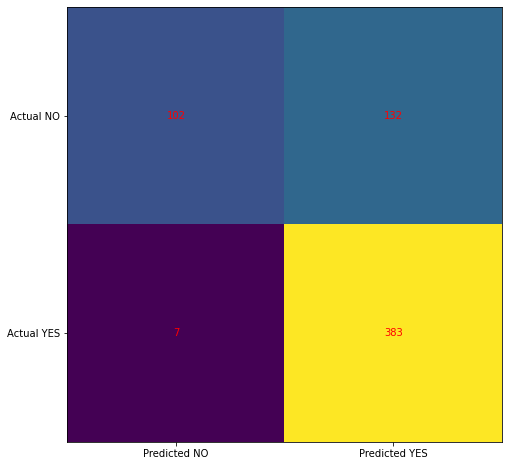

              precision    recall  f1-score   support

           0       0.94      0.44      0.59       234
           1       0.74      0.98      0.85       390

    accuracy                           0.78       624
   macro avg       0.84      0.71      0.72       624
weighted avg       0.82      0.78      0.75       624



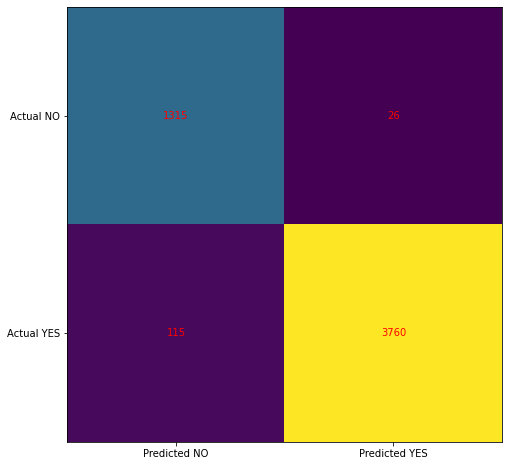

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1341
           1       0.99      0.97      0.98      3875

    accuracy                           0.97      5216
   macro avg       0.96      0.98      0.97      5216
weighted avg       0.97      0.97      0.97      5216



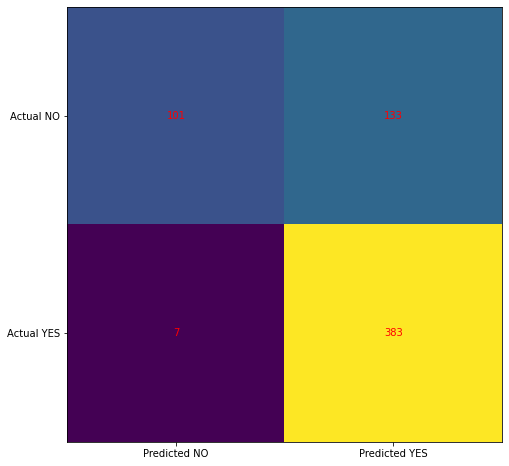

              precision    recall  f1-score   support

           0       0.94      0.43      0.59       234
           1       0.74      0.98      0.85       390

    accuracy                           0.78       624
   macro avg       0.84      0.71      0.72       624
weighted avg       0.81      0.78      0.75       624



In [35]:
#Sag
logisticRegr = LogisticRegression(penalty="none", tol=0.01, solver="sag", class_weight="balanced")
logisticRegr.fit(train_data , train_labels)
y_pred_train = logisticRegr.predict(train_data)
y_pred_test = logisticRegr.predict(test_data)

cm = confusion_matrix(train_labels, y_pred_train)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted NO', 'Predicted YES'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual NO', 'Actual YES'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()
print(classification_report(train_labels, y_pred_train))

cm = confusion_matrix(test_labels, y_pred_test)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted NO', 'Predicted YES'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual NO', 'Actual YES'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

print(classification_report(test_labels, y_pred_test))


logisticRegr = LogisticRegression(penalty="l2", tol=0.01, solver="sag", class_weight="balanced")
logisticRegr.fit(train_data , train_labels)
y_pred_train = logisticRegr.predict(train_data)
y_pred_test = logisticRegr.predict(test_data)

cm = confusion_matrix(train_labels, y_pred_train)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted NO', 'Predicted YES'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual NO', 'Actual YES'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()
print(classification_report(train_labels, y_pred_train))

cm = confusion_matrix(test_labels, y_pred_test)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted NO', 'Predicted YES'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual NO', 'Actual YES'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

print(classification_report(test_labels, y_pred_test))


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


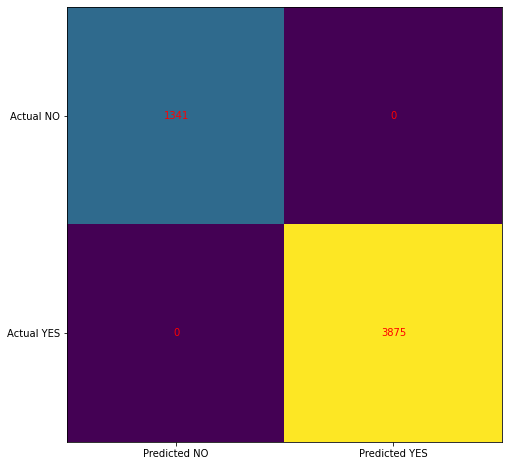

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1341
           1       1.00      1.00      1.00      3875

    accuracy                           1.00      5216
   macro avg       1.00      1.00      1.00      5216
weighted avg       1.00      1.00      1.00      5216



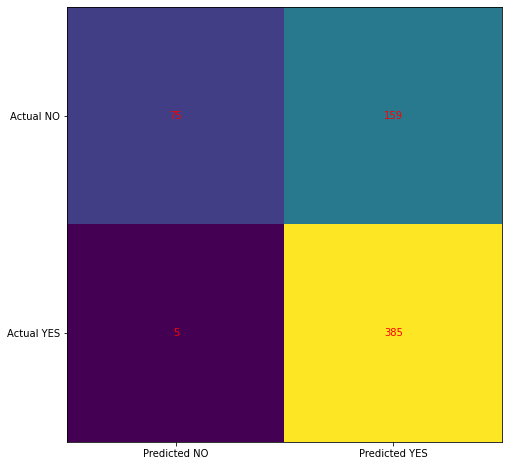

              precision    recall  f1-score   support

           0       0.94      0.32      0.48       234
           1       0.71      0.99      0.82       390

    accuracy                           0.74       624
   macro avg       0.82      0.65      0.65       624
weighted avg       0.79      0.74      0.69       624



C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


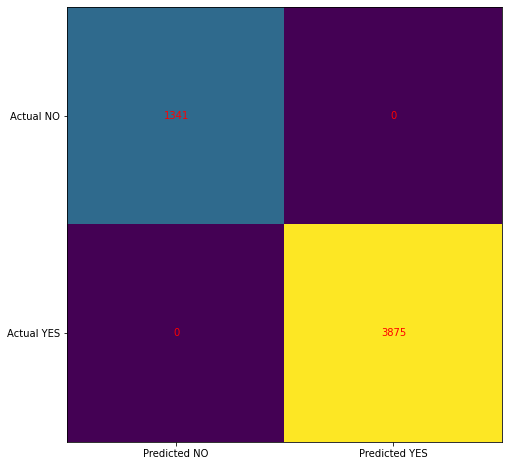

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1341
           1       1.00      1.00      1.00      3875

    accuracy                           1.00      5216
   macro avg       1.00      1.00      1.00      5216
weighted avg       1.00      1.00      1.00      5216



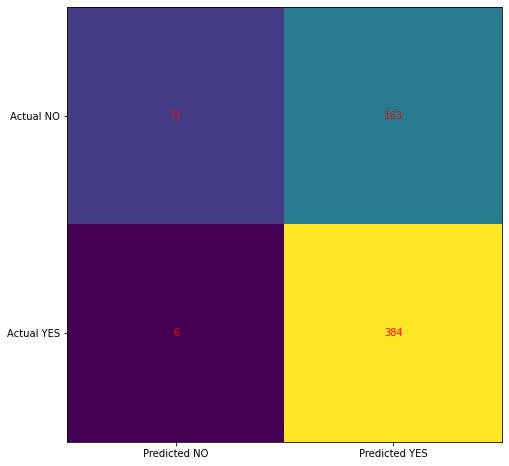

              precision    recall  f1-score   support

           0       0.92      0.30      0.46       234
           1       0.70      0.98      0.82       390

    accuracy                           0.73       624
   macro avg       0.81      0.64      0.64       624
weighted avg       0.78      0.73      0.68       624



In [36]:
#lbfgs
logisticRegr = LogisticRegression(penalty="none", tol=0.01, solver="lbfgs")
logisticRegr.fit(train_data , train_labels)
y_pred_train = logisticRegr.predict(train_data)
y_pred_test = logisticRegr.predict(test_data)

cm = confusion_matrix(train_labels, y_pred_train)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted NO', 'Predicted YES'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual NO', 'Actual YES'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()
print(classification_report(train_labels, y_pred_train))

cm = confusion_matrix(test_labels, y_pred_test)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted NO', 'Predicted YES'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual NO', 'Actual YES'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

print(classification_report(test_labels, y_pred_test))

logisticRegr = LogisticRegression(penalty="l2", tol=0.01, solver="lbfgs")
logisticRegr.fit(train_data , train_labels)
y_pred_train = logisticRegr.predict(train_data)
y_pred_test = logisticRegr.predict(test_data)

cm = confusion_matrix(train_labels, y_pred_train)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted NO', 'Predicted YES'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual NO', 'Actual YES'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()
print(classification_report(train_labels, y_pred_train))

cm = confusion_matrix(test_labels, y_pred_test)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted NO', 'Predicted YES'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual NO', 'Actual YES'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

print(classification_report(test_labels, y_pred_test))


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


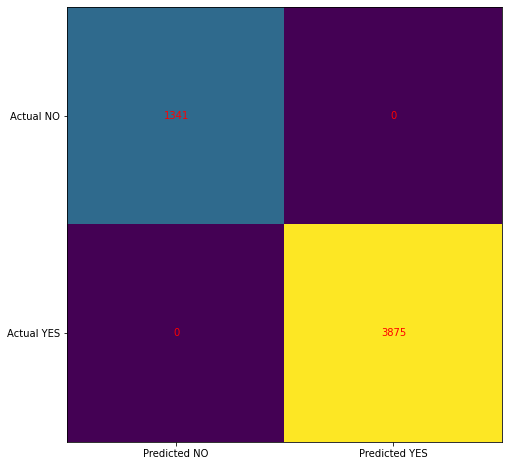

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1341
           1       1.00      1.00      1.00      3875

    accuracy                           1.00      5216
   macro avg       1.00      1.00      1.00      5216
weighted avg       1.00      1.00      1.00      5216



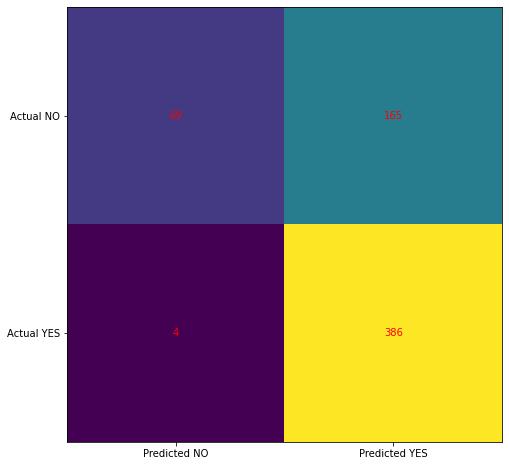

              precision    recall  f1-score   support

           0       0.95      0.29      0.45       234
           1       0.70      0.99      0.82       390

    accuracy                           0.73       624
   macro avg       0.82      0.64      0.63       624
weighted avg       0.79      0.73      0.68       624



C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


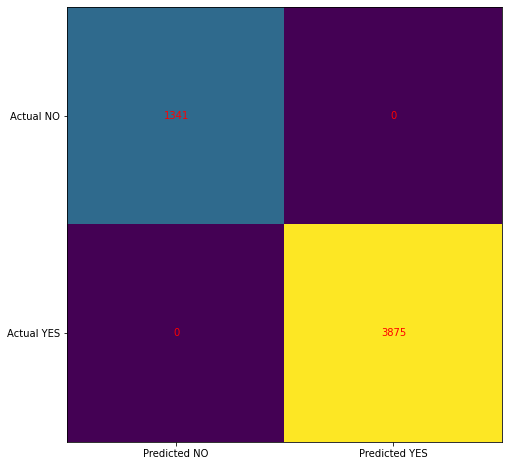

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1341
           1       1.00      1.00      1.00      3875

    accuracy                           1.00      5216
   macro avg       1.00      1.00      1.00      5216
weighted avg       1.00      1.00      1.00      5216



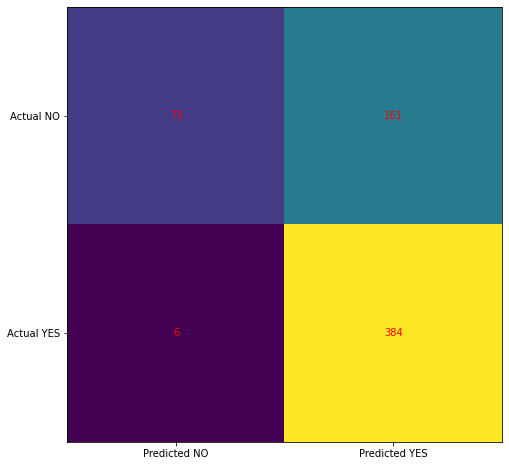

              precision    recall  f1-score   support

           0       0.92      0.31      0.47       234
           1       0.70      0.98      0.82       390

    accuracy                           0.73       624
   macro avg       0.81      0.65      0.64       624
weighted avg       0.79      0.73      0.69       624



In [37]:
#lbfgs
logisticRegr = LogisticRegression(penalty="none", tol=0.01, solver="lbfgs", class_weight="balanced")
logisticRegr.fit(train_data , train_labels)
y_pred_train = logisticRegr.predict(train_data)
y_pred_test = logisticRegr.predict(test_data)

cm = confusion_matrix(train_labels, y_pred_train)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted NO', 'Predicted YES'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual NO', 'Actual YES'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()
print(classification_report(train_labels, y_pred_train))

cm = confusion_matrix(test_labels, y_pred_test)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted NO', 'Predicted YES'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual NO', 'Actual YES'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

print(classification_report(test_labels, y_pred_test))


logisticRegr = LogisticRegression(penalty="l2", tol=0.01, solver="lbfgs", class_weight="balanced")
logisticRegr.fit(train_data , train_labels)
y_pred_train = logisticRegr.predict(train_data)
y_pred_test = logisticRegr.predict(test_data)

cm = confusion_matrix(train_labels, y_pred_train)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted NO', 'Predicted YES'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual NO', 'Actual YES'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()
print(classification_report(train_labels, y_pred_train))

cm = confusion_matrix(test_labels, y_pred_test)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted NO', 'Predicted YES'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual NO', 'Actual YES'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

print(classification_report(test_labels, y_pred_test))
